                     Wind Speed
2015-09-14 17:00:00         0.6
2015-09-14 17:10:00         0.4
2015-09-14 17:20:00         1.7
2015-09-14 17:30:00         2.0
2015-09-14 17:40:00         1.1
...                         ...
2016-11-07 14:10:00         0.9
2016-11-07 14:20:00         0.7
2016-11-07 14:30:00         1.3
2016-11-07 14:40:00         1.5
2016-11-07 14:50:00         1.4

[60468 rows x 1 columns]


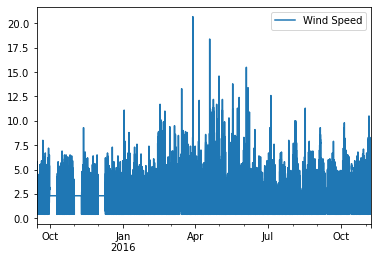

In [3]:
# Import Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocessing data

df = pd.read_csv('Wind Dataset KU.csv', usecols = [0,3], index_col = 0, parse_dates=[0], dayfirst=True)

mn= df['Wind Speed'].mean()

idx = pd.date_range('2015-09-14 17:00:00', '2016-11-07 14:50:00 ', freq = '10T')

df.index = pd.DatetimeIndex(df.index)

df = df.reindex(idx, fill_value = mn )


#df.to_csv('Wind_Dataset_KU_updated')

df.dropna(inplace = True)

df = pd.DataFrame(df['Wind Speed'])

df.plot()

train = df.iloc[:60180,0]
test = df.iloc[60180:,0]
print(df)

In [4]:
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

Decomp_results = seasonal_decompose(df)

Decomp_results.plot()

Decomp_results.seasonal.plot()

ValueError: freq T not understood. Please report if you think this is in error.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=105301.842, Time=39.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=106544.803, Time=4.64 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=106535.925, Time=2.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=106533.279, Time=4.82 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=106542.803, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=105330.398, Time=21.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=105346.692, Time=19.58 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=105188.569, Time=64.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=60.83 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=72.37 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=105296.400, Time=70.02 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=105315.536, Time=25.30 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=105015.665, Time=66.17 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=105713.311, Time=5.25 sec
 ARIMA(5,1

ARIMA(order=(5, 1, 1), scoring_args={}, suppress_warnings=True)

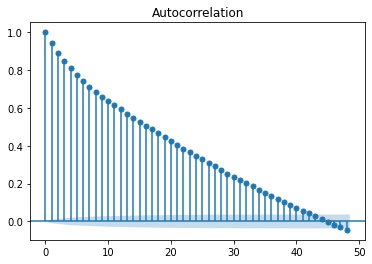

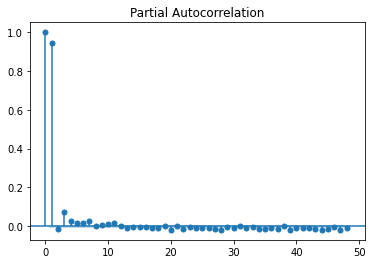

In [5]:
# Finding the Parameters (p,d,q)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train, lags=48)

plot_pacf(train, lags=48)


from pmdarima import auto_arima

auto_arima(df, trace = True)

In [6]:
# Developing ARIMA Model

from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.arima.model.ARIMA import ARIMA

A_Model = ARIMA(train, order = (5,1,1))

predictor = A_Model.fit()

predictor.summary()

Predicted_results = predictor.predict(start = len(train), end = len(train)+len(test) - 1, typ = 'levels')

C:\Users\rabdhaka\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rabdhaka\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


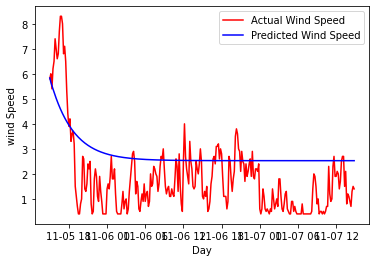

In [7]:
#Plotting result
plt.plot(test, color = 'red', label = 'Actual Wind Speed')
plt.plot(Predicted_results, color = 'blue', label = 'Predicted Wind Speed')
plt.xlabel ('Day')
plt.ylabel('wind Speed')
plt.legend()
plt.show()

In [8]:
#Performance test
tm = test.mean()
pm = Predicted_results.mean()
print(tm)
print(pm)

1.8434027777777773
2.7786115833398615


In [9]:
tstd = test.std()
pstd = Predicted_results.std()
print(tstd)
print(pstd)

1.5431849337146304
0.6014117565849768


In [10]:
def mean_absolute_percentage_error (y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

MAPE = mean_absolute_percentage_error(test,Predicted_results)
print(MAPE)

160.16898981218966
